In [215]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [216]:
data = pd.read_csv('day.csv')

In [217]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


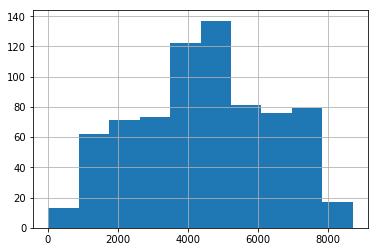

In [218]:
data['cnt'].hist()

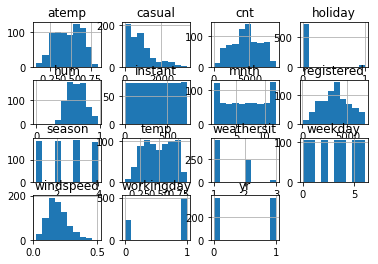

In [219]:
data.hist();

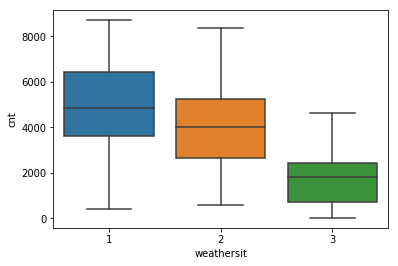

In [220]:
sns.boxplot(data['weathersit'], data['cnt']);

In [221]:
#data.drop(['casual'], axis=1, inplace=True) !!!

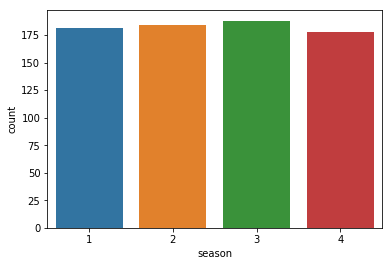

In [222]:
sns.countplot(data['season']);
#data['weathersit'].hist()

In [223]:
data['weathersit'].unique()

array([2, 1, 3])

In [224]:
data['weathersit'].value_counts()

1    463
2    247
3     21
Name: weathersit, dtype: int64

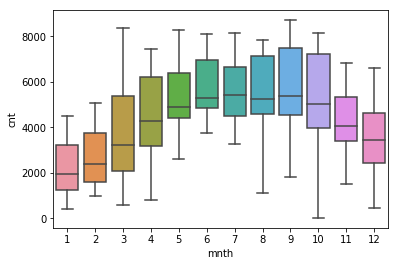

In [225]:
sns.boxplot(data['mnth'], data['cnt']);

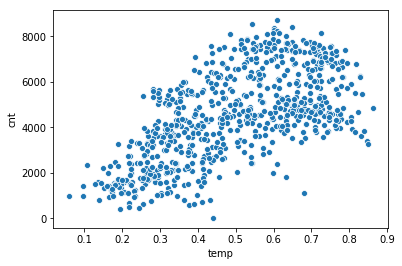

In [226]:
sns.scatterplot(data['temp'], data['cnt']);

In [227]:
data.drop(['atemp', 'instant', 'dteday', 'casual', 'registered', 'season'], axis=1, inplace=True)

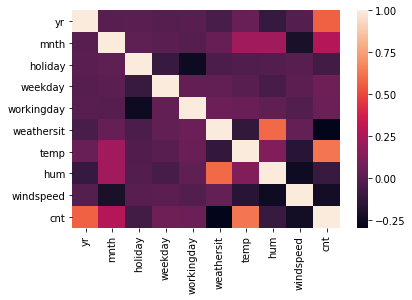

In [228]:
sns.heatmap(data.corr());

In [229]:
data.head()

,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,0,1,0,6,0,2,0.344167,0.805833,0.160446,985
1,0,1,0,0,0,2,0.363478,0.696087,0.248539,801
2,0,1,0,1,1,1,0.196364,0.437273,0.248309,1349
3,0,1,0,2,1,1,0.200000,0.590435,0.160296,1562
4,0,1,0,3,1,1,0.226957,0.436957,0.186900,1600


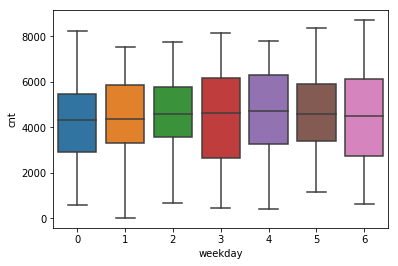

In [230]:
sns.boxplot(data['weekday'], data['cnt']);

In [231]:
X_df, y_series = data.drop('cnt', axis=1), data['cnt'] # 

In [232]:
y_series.head()

0     985
1     801
2    1349
3    1562
4    1600
Name: cnt, dtype: int64

In [234]:
ols = LinearRegression(normalize=True)

In [283]:
train_part_len = int(data.shape[0] * 0.7)

X_train = X_df.values[:train_part_len, :]
X_valid = X_df.values[train_part_len: , :]
y_train = y_series.values[:train_part_len]
y_valid = y_series.values[train_part_len:]

In [236]:
from sklearn.metrics import mean_squared_error

In [237]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [238]:
y_ols_pred = ols.predict(X_valid)

In [239]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y,p))

In [240]:
def beautiful_coef(coefs, feature_names = X_df.columns):
    return pd.DataFrame(coefs, index=feature_names, columns = ['coef']).sort_values('coef', ascending=False)

In [241]:
rmse(y_valid, y_ols_pred)

1209.2865957788918

In [242]:
ols.coef_

array([ 2112.39378502,   106.04018656,  -499.38358823,    48.36211164,
          31.41483932,  -511.38289839,  5585.42445506, -1019.28261786,
       -2768.86343667])

In [243]:
beautiful_coef(ols.coef_, feature_names=X_df.columns)

,coef
temp,5585.424455
yr,2112.393785
mnth,106.040187
weekday,48.362112
workingday,31.414839
holiday,-499.383588
weathersit,-511.382898
hum,-1019.282618
windspeed,-2768.863437


In [244]:
ridge = Ridge(random_state=17, normalize=True)

In [245]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=17, solver='auto', tol=0.001)

In [246]:
beautiful_coef(ridge.coef_)

,coef
temp,2741.583105
yr,846.117430
workingday,56.926144
mnth,40.482905
weekday,23.023544
holiday,-283.612203
weathersit,-349.618305
hum,-422.926991
windspeed,-1655.646214


In [248]:
ridge_valid_pred = ridge.predict(X_valid)

In [250]:
rmse(y_valid, ridge_valid_pred)

1866.0022757074937

In [252]:
alphas = np.logspace(-4, 4, 100)

In [266]:
ridge_cv = RidgeCV(alphas=alphas, cv=10, normalize=True).fit(X_train, y_train)

In [267]:
ridge_cv.alpha_

0.018307382802953697

In [268]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)

In [269]:
rmse(y_valid, best_ridge_valid_pred)

1205.6253003254517

In [271]:
lasso = LassoCV(alphas=alphas, cv=10, normalize=True).fit(X_train, y_train)

In [273]:
lasso.alpha_

0.06734150657750829

In [274]:
best_lasso_valid_pred = lasso.predict(X_valid)

In [276]:
rmse(y_valid, best_lasso_valid_pred)

1209.0774375518988

In [277]:
beautiful_coef(lasso.coef_)

,coef
temp,5578.968732
yr,2106.343875
mnth,105.270854
weekday,47.718829
workingday,28.895980
holiday,-492.280253
weathersit,-511.205484
hum,-1003.387351
windspeed,-2747.738650


In [278]:
beautiful_coef(ridge_cv.coef_)

,coef
temp,5480.665148
yr,2055.677946
mnth,102.403693
weekday,47.543478
workingday,34.174091
holiday,-491.078501
weathersit,-511.854646
hum,-980.328017
windspeed,-2734.743216
